In [6]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


# 1. Análise descritiva dos dados
Após copiar o arquivo, vamos carregar as bibliotecas base para fazer a análise descritiva

In [7]:
import streamlit as st
import pandas as pd
import numpy as np 
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import random
import os
import matplotlib.patheffects as path_effects
import itertools
from scipy import stats
import math

def descritiva_tabela(data_frame_selec):
    df2 = data_frame_selec.describe(include = 'all')
    df2.loc['dtype'] = data_frame_selec.dtypes
    df2.loc['size'] = len(data_frame_selec)
    df2.loc['% count'] = data_frame_selec.isnull().mean()
    return pd.DataFrame(df2.transpose())

def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

Verificando missings, quantidades e quantis

In [8]:
#os.chdir('D:\\Users\\krums\\Documents\\MBA FIAP IA\Bootcamp IA & Machine Learning')
df_creditos = pd.read_csv('Database\\solicitacoescredito.csv')

In [9]:
df_creditos.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [10]:
descritiva_tabela(df_creditos)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,size,% count
numero_solicitacao,8973.0,NaN,NaN,NaN,4550.042015,2603.485853,1.0,2316.0,4559.0,6802.0,9045.0,int64,8973,0.0
razaoSocial,8973,2759,Malcolm Bolton,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.0
nomeFantasia,8973,2677,Nathan Jones,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.0
cnpjSemTraco,8973,2829,AVAO63044598911311,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.0
maiorAtraso,8973.0,NaN,NaN,NaN,24.642594,66.180793,0.0,3.0,6.0,22.0,1265.0,int64,8973,0.0
margemBrutaAcumulada,8973.0,NaN,NaN,NaN,0.362176,0.201455,0.0,0.281395,0.402895,0.50786,1.0,float64,8973,0.0
percentualProtestos,7475.0,NaN,NaN,NaN,0.01926,0.593579,0.0,0.0,0.0,0.0,36.983728,float64,8973,0.166945
primeiraCompra,8867,1950,2012-12-21T00:00:00,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.011813
prazoMedioRecebimentoVendas,8973.0,NaN,NaN,NaN,23.083027,68.177649,0.0,0.0,0.0,30.0,1605.0,int64,8973,0.0
titulosEmAberto,8973.0,NaN,NaN,NaN,64871.00633,248285.153353,0.0,0.0,0.0,17250.0,3938589.7,float64,8973,0.0


### 1.1 Analisando e filtrando de casos inconsistentes
Para a amostra, temos que verificar:
1. Casos de clientes que tem mais de um nome de `razaoSocial`
2. Casos com solicitação de valor zero

In [11]:
df_creditos.loc[df_creditos['valorSolicitado']<=0.0]   

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista


In [12]:
df_creditos_count_razao = df_creditos.groupby('cnpjSemTraco')['razaoSocial'].nunique().reset_index().rename(columns={'razaoSocial':'qtde_razaoSocial'})

In [13]:
#8 solicitações provenientes de clientes com mais de uma razão social
df_creditos.merge(df_creditos_count_razao[df_creditos_count_razao['qtde_razaoSocial']>1],on=['cnpjSemTraco'],how='inner').head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista,qtde_razaoSocial
0,955,Mrs. Rosemary Fleming,Dr. Josephine Scott,OIOX50590478841783,0,0.000000,NaN,2019-07-10T14:56:04,0,0.0,...,0.0,2010.0,De 6 a 10 anos,93700.0,False,True,0.0,196653.0,2020-03-09T11:11:25,2
1,2453,Mrs. Rosemary Fleming,Dr. Josephine Scott,OIOX50590478841783,0,0.000000,NaN,2019-07-10T14:56:04,0,0.0,...,0.0,2010.0,De 6 a 10 anos,93700.0,False,True,0.0,196653.0,2020-05-29T18:55:51,2
2,4013,Ms. Jasmine Clark,Jeffrey Fisher,OIOX50590478841783,0,0.416005,0.0,2018-12-06T00:00:00,0,0.0,...,5301457.0,2016.0,De 0 a 5 anos,93700.0,False,True,1.0,169974.0,2020-08-11T20:01:06,2
3,2379,Samuel Ryan,Rosie Andrews-Richards,YZJZ74754922350776,0,0.423515,0.0,2020-04-24T00:00:00,0,0.0,...,1736000.0,1996.0,Acima de 17 anos,3500000.0,False,False,1.0,127853.0,NaN,2
4,2408,Stacey Taylor,Carly Hamilton,YZJZ74754922350776,0,0.000000,0.0,2020-05-28T03:00:00,0,0.0,...,1736000.0,1996.0,Acima de 17 anos,3500000.0,False,False,0.0,127853.0,NaN,2


In [14]:
df_creditos = df_creditos.merge(df_creditos_count_razao[df_creditos_count_razao['qtde_razaoSocial']==1],on=['cnpjSemTraco'],how='inner')

### 1.2 Criando o dataset para clientes

No caso temos que pegar as features dos clientes que resumem cada um deles. Podemos pegar as features em função to tempo (agregando variaveis por solicitação para cada cliente), porém testaremos a clusterização sem usar a variação temporal ainda. Se isso já ajudar a descrever é um bom progresso:

In [15]:
#features calculadas (em função do tempo)
#buscando a linha índice de solicitação

df_clientes_aux = df_creditos.groupby(df_creditos['cnpjSemTraco'])['numero_solicitacao'].min().reset_index().rename(columns={'numero_solicitacao':'min_solicitacao'})

In [16]:
df_clientes = df_creditos.merge(df_clientes_aux,left_on=['cnpjSemTraco','numero_solicitacao'], right_on=['cnpjSemTraco','min_solicitacao'],how='inner').copy()

Devemos selecionar as variáveis que maximizam o tamanho da amostra. para isso, olhamos todas as variáveis pertinentes aos clientes e verificamos quanto de missing temos. O conjunto de colunas deve ter o menor % de missings possivel.

In [17]:
df1 = descritiva_tabela(df_clientes)
df1.filter(['cnpjSemTraco','maiorAtraso'
            ,'margemBrutaAcumulada','percentualProtestos','primeiraCompra'
            ,'faturamentoBruto','margemBruta','periodoDemonstrativoEmMeses','custos'
            ,'anoFundacao','capitalSocial','restricoes','empresa_MeEppMei'
            ,'scorePontualidade'],axis=0)['% count'].max()

0.2208067940552017

In [18]:
df_clientes = df_clientes.filter(['cnpjSemTraco','maiorAtraso','valorSolicitado'
                                 ,'margemBrutaAcumulada','percentualProtestos','primeiraCompra'
                                 ,'faturamentoBruto','margemBruta','periodoDemonstrativoEmMeses','custos'
                                 ,'anoFundacao','capitalSocial','restricoes','empresa_MeEppMei'
                                 ,'scorePontualidade'],axis=1)

Agora temos que fazer um hot encode de algumas variáveis:

1. tirar todos os nulos de variáveis de cliente;
2. Podemos usar como default da `primeiraCompra` pra quem não tem como sendo uma data 1900-01-01;
3. `restricoes` deve ser tratada com hot encode;

In [19]:
df_desc_cli = descritiva_tabela(df_clientes)
df_desc_cli

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,size,% count
cnpjSemTraco,2826,2826,KEBE17609492220843,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2826,0.0
maiorAtraso,2826.0,NaN,NaN,NaN,19.61465,61.723435,0.0,0.0,4.0,17.0,1265.0,int64,2826,0.0
valorSolicitado,2826.0,NaN,NaN,NaN,167884.675867,2993144.610906,100.0,20000.0,35000.0,50000.0,150000000.0,float64,2826,0.0
margemBrutaAcumulada,2826.0,NaN,NaN,NaN,0.330253,0.219489,0.0,0.122448,0.37544,0.496265,1.0,float64,2826,0.0
percentualProtestos,2202.0,NaN,NaN,NaN,0.031435,0.871212,0.0,0.0,0.0,0.0,36.983728,float64,2826,0.220807
primeiraCompra,2749,1948,2021-01-19T00:00:00,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2826,0.027247
faturamentoBruto,2633.0,NaN,NaN,NaN,35221709.997721,208041981.414704,0.0,771058.0,2576271.0,8581828.0,4464000000.0,float64,2826,0.068294
margemBruta,2633.0,NaN,NaN,NaN,8254899.803266,59114384.397134,-10215304.0,0.0,0.0,846544.0,1373143082.0,float64,2826,0.068294
periodoDemonstrativoEmMeses,2633.0,NaN,NaN,NaN,10.317129,3.403478,1.0,12.0,12.0,12.0,12.0,float64,2826,0.068294
custos,2633.0,NaN,NaN,NaN,13611760.81466,108083525.820899,-346633805.0,0.0,0.0,781891.0,2958235000.0,float64,2826,0.068294


In [20]:
#1.
df_clientes['primeiraCompra'].fillna('1900-01-01 00:00:00', inplace=True)
df_clientes['primeiraCompra'] = df_clientes['primeiraCompra'].apply(lambda x:re.sub('T',' ',x))
#Garantindo que teremos valores de data decentes:
df_clientes.loc[df_clientes['primeiraCompra']<='1900-01-01 00:00:00',['primeiraCompra']]='1900-01-01 00:00:00'
df_clientes['primeiraCompra'] = pd.to_datetime(df_clientes['primeiraCompra'], format='%Y-%m-%d %H:%M:%S')

#fazendo a substituição de nulos pela mediana da base de clientes:
#para isso pegamos todas as variáveis que são somente numéricas:
# lista_numericas = df_desc_cli.loc[[elm in ['float64','int64','int32'] for elm in df_desc_cli['dtype'].values]].index

# for coluna_sel in lista_numericas:
#     df_clientes[coluna_sel].fillna(np.nanmedian(df_clientes[coluna_sel]),inplace=True)

# dando uma ajustada em alugns casos particulares:
# df_clientes.loc[df_clientes['anoFundacao']<=1500] = np.nanmedian(df_clientes['anoFundacao'])

#2. mudando as colunas categorias em hot encoding (para as dicotomicas é mais fácil)
df_clientes['restricoes'] = df_clientes['restricoes']*1
df_clientes['restricoes'] = df_clientes['restricoes'].apply(float)
df_clientes['empresa_MeEppMei'] = df_clientes['empresa_MeEppMei']*1
df_clientes['empresa_MeEppMei'] = df_clientes['empresa_MeEppMei'].apply(float)
df_clientes['maiorAtraso'] = df_clientes['maiorAtraso'].apply(float)

#3. 
df_clientes.dropna(inplace=True)
df_clientes.reset_index(inplace=True)

In [21]:
#a clusterização deve ter variáveis em função das características do cliente, ou seja:
X = df_clientes.filter(['margemBrutaAcumulada','percentualProtestos','empresa_MeEppMei'
                        ,'faturamentoBruto','margemBruta','custos','margemBruta_neg','custos_neg'
                        ,'anoFundacao','capitalSocial','restricoes','scorePontualidade']
,axis=1).copy()

Padronizando as variáveis escolhidas para terem o mesmo peso:

In [22]:
X_scale=pd.DataFrame(scale(X),columns=X.columns.values)
random.seed(1994)
pca = PCA()
X_reduced = pca.fit_transform(X_scale)
df_comp = pd.DataFrame(X_reduced,columns=['PC'+str(num_c) for num_c in range(0,pca.n_components_)])
df_comp.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.442137,0.729982,-0.636816,-0.199829,0.359702,0.932409,-0.257702,0.801978,-0.027778,-0.022640
1,-0.509896,-1.017016,-1.055411,-0.173038,0.071001,0.405242,0.588706,-0.708794,0.070962,0.074815
2,1.016032,-0.557336,0.378276,-0.209635,0.405657,-0.509494,-0.533718,-0.083240,-0.369612,-0.860917
3,-0.053690,0.036738,0.717991,-0.127360,0.323460,-0.456082,-0.449861,0.508172,-0.018140,-0.142574
4,-0.223696,0.573461,0.821854,-0.125032,0.372968,-0.384228,-0.636467,0.947186,0.655465,-0.352271


Verificando o % de explicação por componente principal

In [23]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 26.74,  39.25,  50.15,  60.36,  69.99,  78.78,  86.59,  93.86,
        97.15, 100.  ])

In [24]:
kmeans = KMeans(4, random_state=0)
labels_KMEANS = kmeans.fit(df_comp).predict(df_comp)

In [25]:
gmm = GaussianMixture(n_components=4).fit(df_comp)
labels_GMM = gmm.predict(df_comp)

In [26]:
df_comp['labels_KMEANS']=labels_KMEANS
df_comp['labels_GMM']=labels_GMM
X['labels_KMEANS']=labels_KMEANS
X['labels_GMM']=labels_GMM


Visualizando com componentes principais

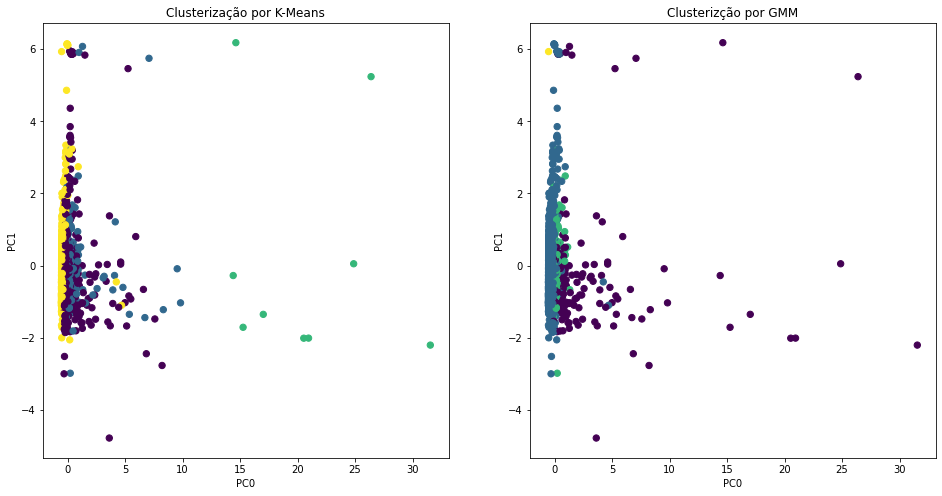

In [27]:
from turtle import title

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

ax1.scatter(df_comp['PC0'], df_comp['PC1'], c=df_comp['labels_KMEANS'], s=40, cmap='viridis')
ax1.set_title('Clusterização por K-Means')
ax2.scatter(df_comp['PC0'], df_comp['PC1'], c=df_comp['labels_GMM'], s=40, cmap='viridis')
ax2.set_title('Clusterizção por GMM')

for ax in fig.axes:
    ax.set_xlabel('PC0')
    ax.set_ylabel('PC1')

Visualizando por cada variável

Primeiramente por KMEANS

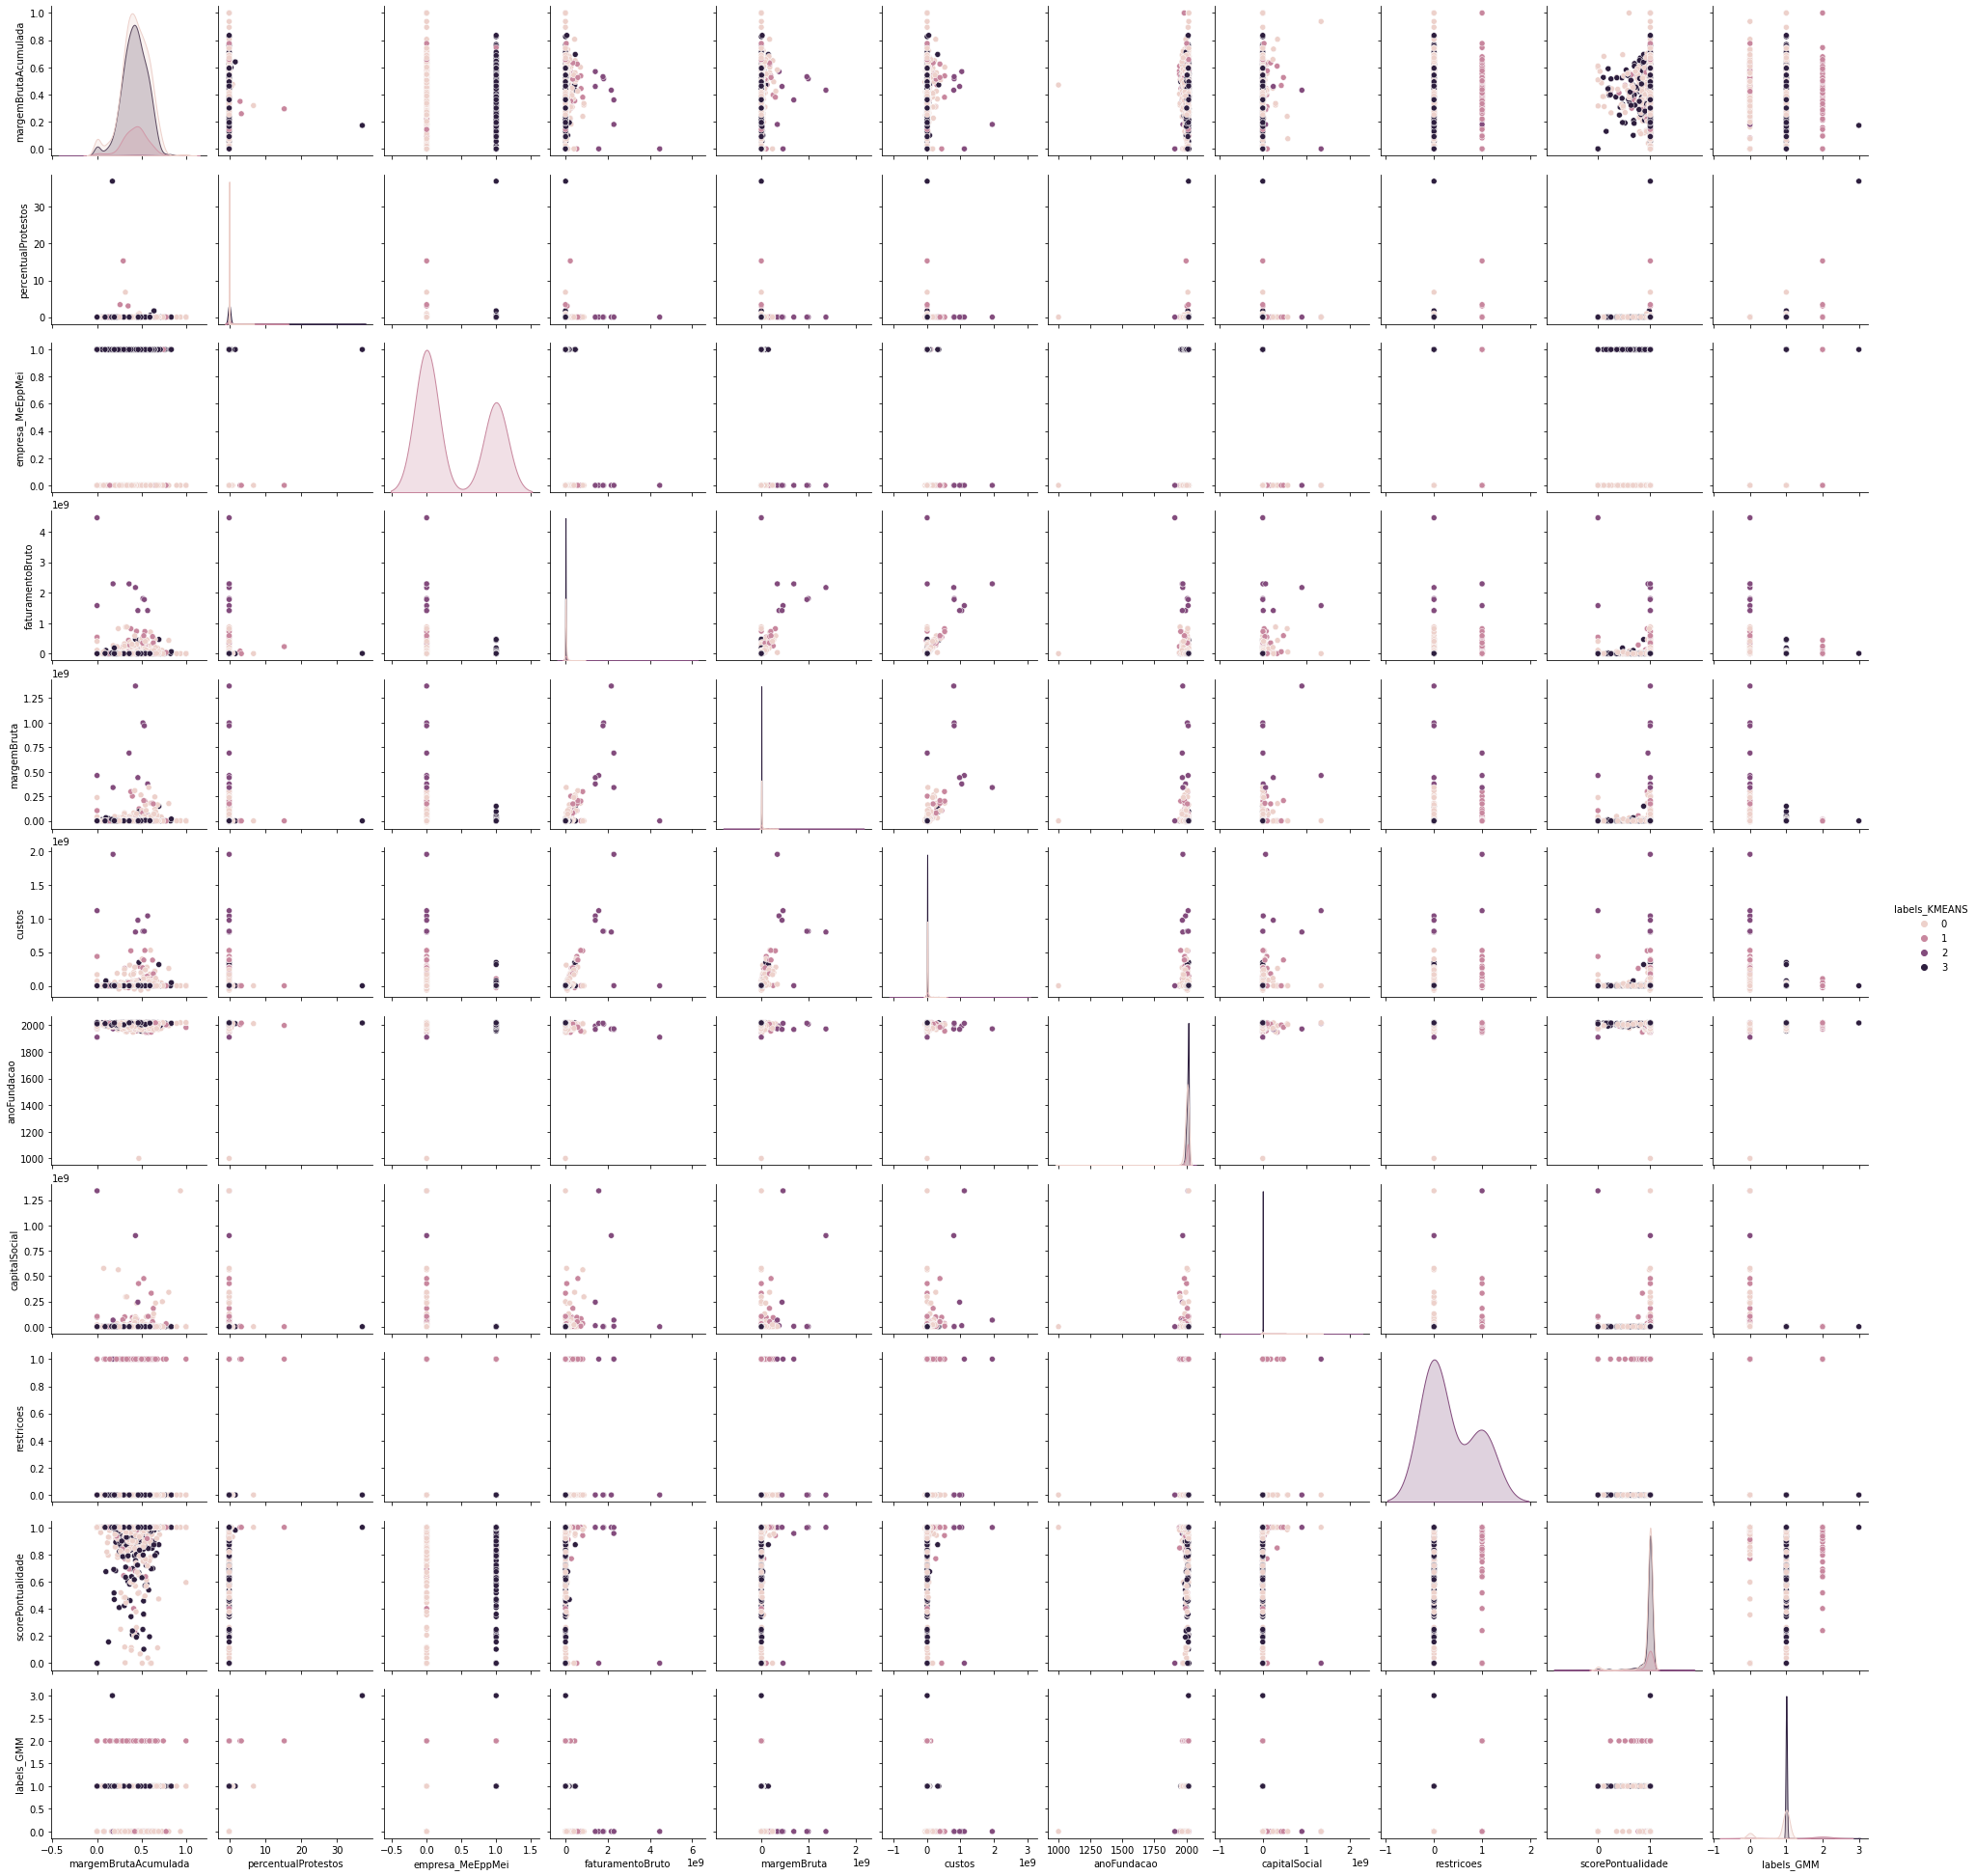

In [28]:
sns.pairplot(X, hue="labels_KMEANS")

Por GMM

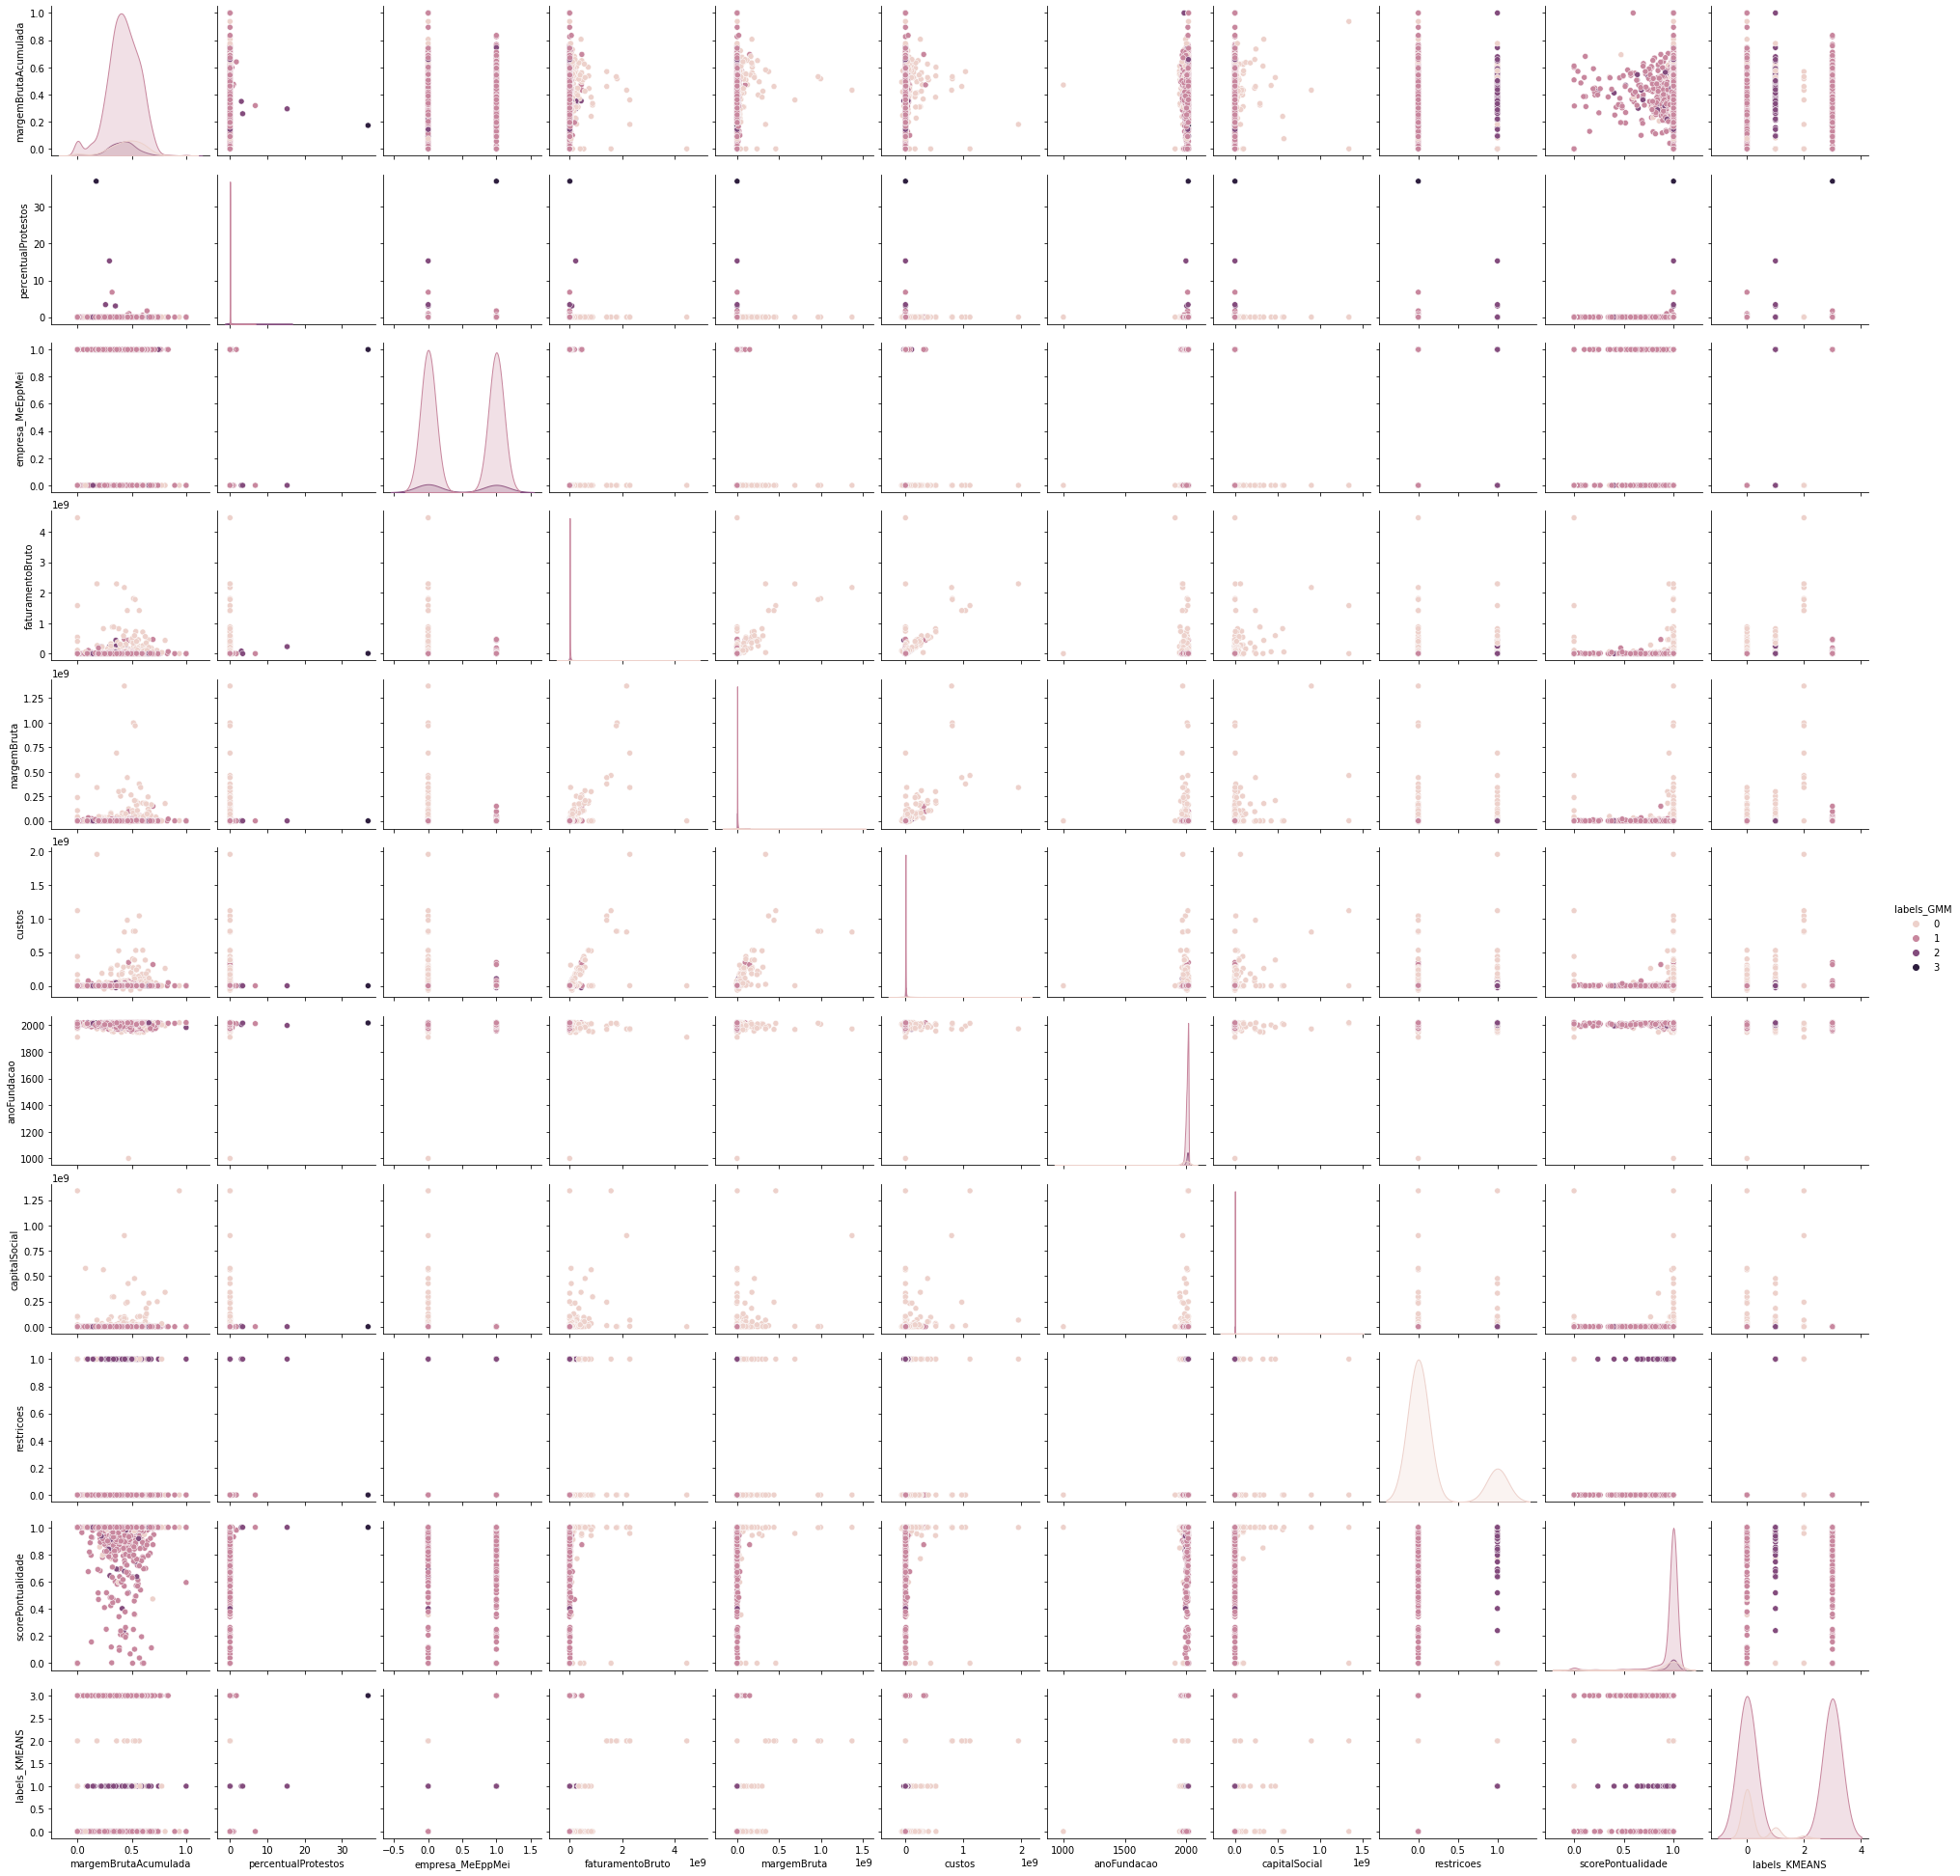

In [29]:
sns.pairplot(X, hue="labels_GMM")

Verificando métricas entre grupos, e também a variancia entre grupos:

In [30]:
from scipy.spatial import distance
matrix_dist = distance.cdist(X, X, 'euclidean')

In [31]:
pd_distancias = pd.DataFrame(matrix_dist,columns=X.index.values)
pd_distancias = pd_distancias.stack()
pd_distancias.name = 'distancia'
pd_distancias = pd_distancias.reset_index()

In [32]:
X_labels = X[['labels_KMEANS','labels_GMM']]
X_labels['index_chave'] = X_labels.index.values
X_labels_1 = X_labels.rename({'labels_KMEANS':'labels_KMEANS_1','labels_GMM':'labels_GMM_1','index_chave':'index_chave'},axis='columns').copy()
X_labels_2 = X_labels.rename({'labels_KMEANS':'labels_KMEANS_2','labels_GMM':'labels_GMM_2','index_chave':'index_chave'},axis='columns').copy()
pd_distancias = pd_distancias.merge(X_labels_1,left_on='level_0',right_on='index_chave',how='inner')
pd_distancias = pd_distancias.merge(X_labels_2,left_on='level_1',right_on='index_chave',how='inner')
dist_entre_GMM = pd_distancias[pd_distancias['labels_KMEANS_2']!=pd_distancias['labels_KMEANS_1']]['distancia'].sum()
dist_entre_KMEANS=pd_distancias[pd_distancias['labels_GMM_2']!=pd_distancias['labels_GMM_1']]['distancia'].sum()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_6804\2529771682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_labels['index_chave'] = X_labels.index.values


In [33]:
razao_vars = dist_entre_KMEANS/dist_entre_GMM
if razao_vars>1:
    resp = 'maior'
else:
    resp='menor'

Separar na descritiva de categóricas e numericas, tendo discretas e continuas:

In [34]:
df_clientes['index'] = df_clientes.index
df_clientes = df_clientes.merge(X_labels,left_on='index',right_on='index_chave',how='inner').copy()
df_clientes.labels_KMEANS = df_clientes.labels_KMEANS.astype("category")
df_clientes.labels_GMM = df_clientes.labels_GMM.astype("category")
df_clientes.drop(['index_chave'],axis=1,inplace=True)

In [35]:

colunas_cont = ['margemBrutaAcumulada','percentualProtestos'
                        ,'faturamentoBruto','margemBruta','custos'
                        ,'anoFundacao','capitalSocial','scorePontualidade']

labels_cols=['labels_GMM','labels_KMEANS','index']

# empilhando as variáveis num formato longo:
# all_columns = df_clientes.columns
df_clientes_emp  = df_clientes.melt(id_vars=labels_cols)
df_clientes_emp_c = df_clientes_emp.loc[[elm in colunas_cont for elm in df_clientes_emp['variable'].values]]
# df_clientes_emp_c['variable'].drop_duplicates()

Trazendo em formato de tabela

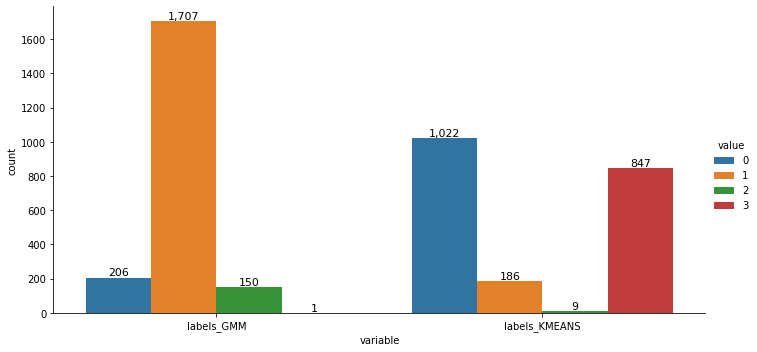

In [36]:
#lembrando da distribuição de empresas por cluster:
df_barplot = df_clientes[['labels_GMM','labels_KMEANS']].melt()

g = sns.catplot(x="variable", hue='value',kind='count', data=df_barplot,aspect=2)
ax = g.axes[0][0]

for p in ax.patches:
    ax.annotate('{:,d}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
        textcoords='offset points')

Como pode-se perceber, a distribuição da clusterização com GMM é mais homoegena, e por isso pode ser um motivo para ser mais recomendável

In [37]:
print('A distancia entre grupos de KMEANS é {razao_vars}% {resp} do que o agrupamento por GMM'.format(razao_vars=round(abs(1-razao_vars)*100,2), resp=resp))

A distancia entre grupos de KMEANS é 8.18% maior do que o agrupamento por GMM


POr mais que a clusterização por KMEANS tenha um poder de distinguir os grupos 12% maior, sua distribuição não é homogenea.

Assim sendo, seguimos pela clusterização com GMM

In [38]:
#colunas para resumo:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:,.2f}'.format)
labels_selec='labels_GMM'
cols_selec_resumo = [elm for elm in df_clientes.columns if elm not in ['index','cnpjSemTraco','labels_KMEANS','primeiraCompra','periodoDemonstrativoEmMeses']]
describe_clus = df_clientes.filter(cols_selec_resumo,axis=1).groupby(labels_selec).describe(include='all',percentiles = [0.1,0.25,0.5,0.75,0.9],datetime_is_numeric=True).transpose()
# inferno na terra para selecionar essa porcaria:
#criando o index que possui todas as variáveis que queremos:
lista_indices = list(itertools.product(cols_selec_resumo,['min','10%','25%','50%','75%','90%','max']))
describe_clus.filter(lista_indices,axis=0)
# posso criar graficos de barra para cada valor desse describe por grupo, sendo minimo, media e maximo como barras diferentes lado a lado por grupo, por variável

labels_GMM                              0              1              2            3
maiorAtraso          min             0.00           0.00           0.00        63.00
                     10%             0.00           0.00           0.00        63.00
                     25%             0.00           0.00           3.00        63.00
                     50%             4.00           4.00          10.00        63.00
                     75%            20.00          15.00          32.75        63.00
                     90%            62.50          40.00          78.20        63.00
                     max           315.00         977.00         794.00        63.00
valorSolicitado      min         5,000.00       1,600.00       5,000.00    45,000.00
                     10%        20,000.00      10,000.00      10,000.00    45,000.00
                     25%        31,250.00      20,000.00      20,000.00    45,000.00
                     50%        60,000.00      30,000.00      30,000.00    45,000.00
                     75%       200,000.00      50,000.00      50,000.00    45,000.00
                     90%       787,500.00     100,000.00     151,000.00    45,000.00
                     max     4,900,000.00   5,000,000.00   1,400,000.00    45,000.00
margemBrutaAcumulada min             0.00           0.00           0.00         0.17
                     10%             0.25           0.25           0.28         0.17
                     25%             0.36           0.34           0.34         0.17
                     50%             0.47           0.42           0.42         0.17
                     75%             0.56           0.53           0.49         0.17
                     90%             0.63           0.60           0.58         0.17
                     max             0.94           1.00           1.00         0.17
percentualProtestos  min             0.00           0.00           0.00        36.98
                     10%             0.00           0.00           0.00        36.98
                     25%             0.00           0.00           0.00        36.98
                     50%             0.00           0.00           0.00        36.98
                     75%             0.00           0.00           0.00        36.98
                     90%             0.00           0.00           0.00        36.98
                     max             0.00           6.77          15.30        36.98
faturamentoBruto     min             0.00           0.00           0.00 6,908,692.00
                     10%     2,326,217.50     135,735.40     108,281.40 6,908,692.00
                     25%    28,231,498.75     743,924.00     851,612.75 6,908,692.00
                     50%    70,662,713.50   2,126,067.00   2,114,325.50 6,908,692.00
                     75%   178,258,128.25   5,195,888.00   8,396,151.50 6,908,692.00
                     90%   482,547,593.00  15,053,374.80  43,897,219.70 6,908,692.00
                     max 4,464,000,000.00 472,939,365.00 438,103,964.00 6,908,692.00
margemBruta          min   -10,215,304.00    -338,047.00  -1,469,120.00         0.00
                     10%             0.00           0.00           0.00         0.00
                     25%             0.00           0.00           0.00         0.00
                     50%     9,965,278.50           0.00           0.00         0.00
                     75%    44,948,840.00     307,324.00     210,799.25         0.00
                     90%   174,854,161.50   3,230,770.00   2,743,994.30         0.00
                     max 1,373,143,082.00 149,272,777.00  17,615,667.00         0.00
custos               min   -65,022,701.00  -7,231,554.00 -27,592,668.00         0.00
                     10%             0.00           0.00           0.00         0.00
                     25%             0.00           0.00           0.00         0.00
                     50%    11,710,211.00           0.00           0.00         0.00
     

In [39]:
from turtle import width

sns.set_theme(style="ticks") 

# Initialize the figure with a logarithmic x axis

# df_describe_vars = pd.DataFrame(list(describe_clus.index.values),columns=['var_cliente','var_describe'])
df_describe = describe_clus.filter(lista_indices,axis=0).reset_index()
df_describe.rename({'level_0':'var_cliente','level_1':'var_describe'},axis='columns',inplace=True)
df_describe = df_describe.melt(id_vars=['var_describe','var_cliente'])
df_describe_1 = df_describe.loc[[vard not in ['margemBruta','margemBrutaAcumulada','faturamentoBruto','custos','capitalSocial'] for vard in df_describe['var_cliente']]]
df_describe_2 = df_describe.loc[[vard in ['margemBruta','margemBrutaAcumulada','faturamentoBruto','custos','capitalSocial'] for vard in df_describe['var_cliente']]]
# df_describe.drop(['labels_KMEANS'],axis=1)

# sea = sns.FacetGrid(df_describe, row = "var_cliente")
#sea.map(sns.barplot, "var_describe", "pulse",order = ["no fat", "low fat"])

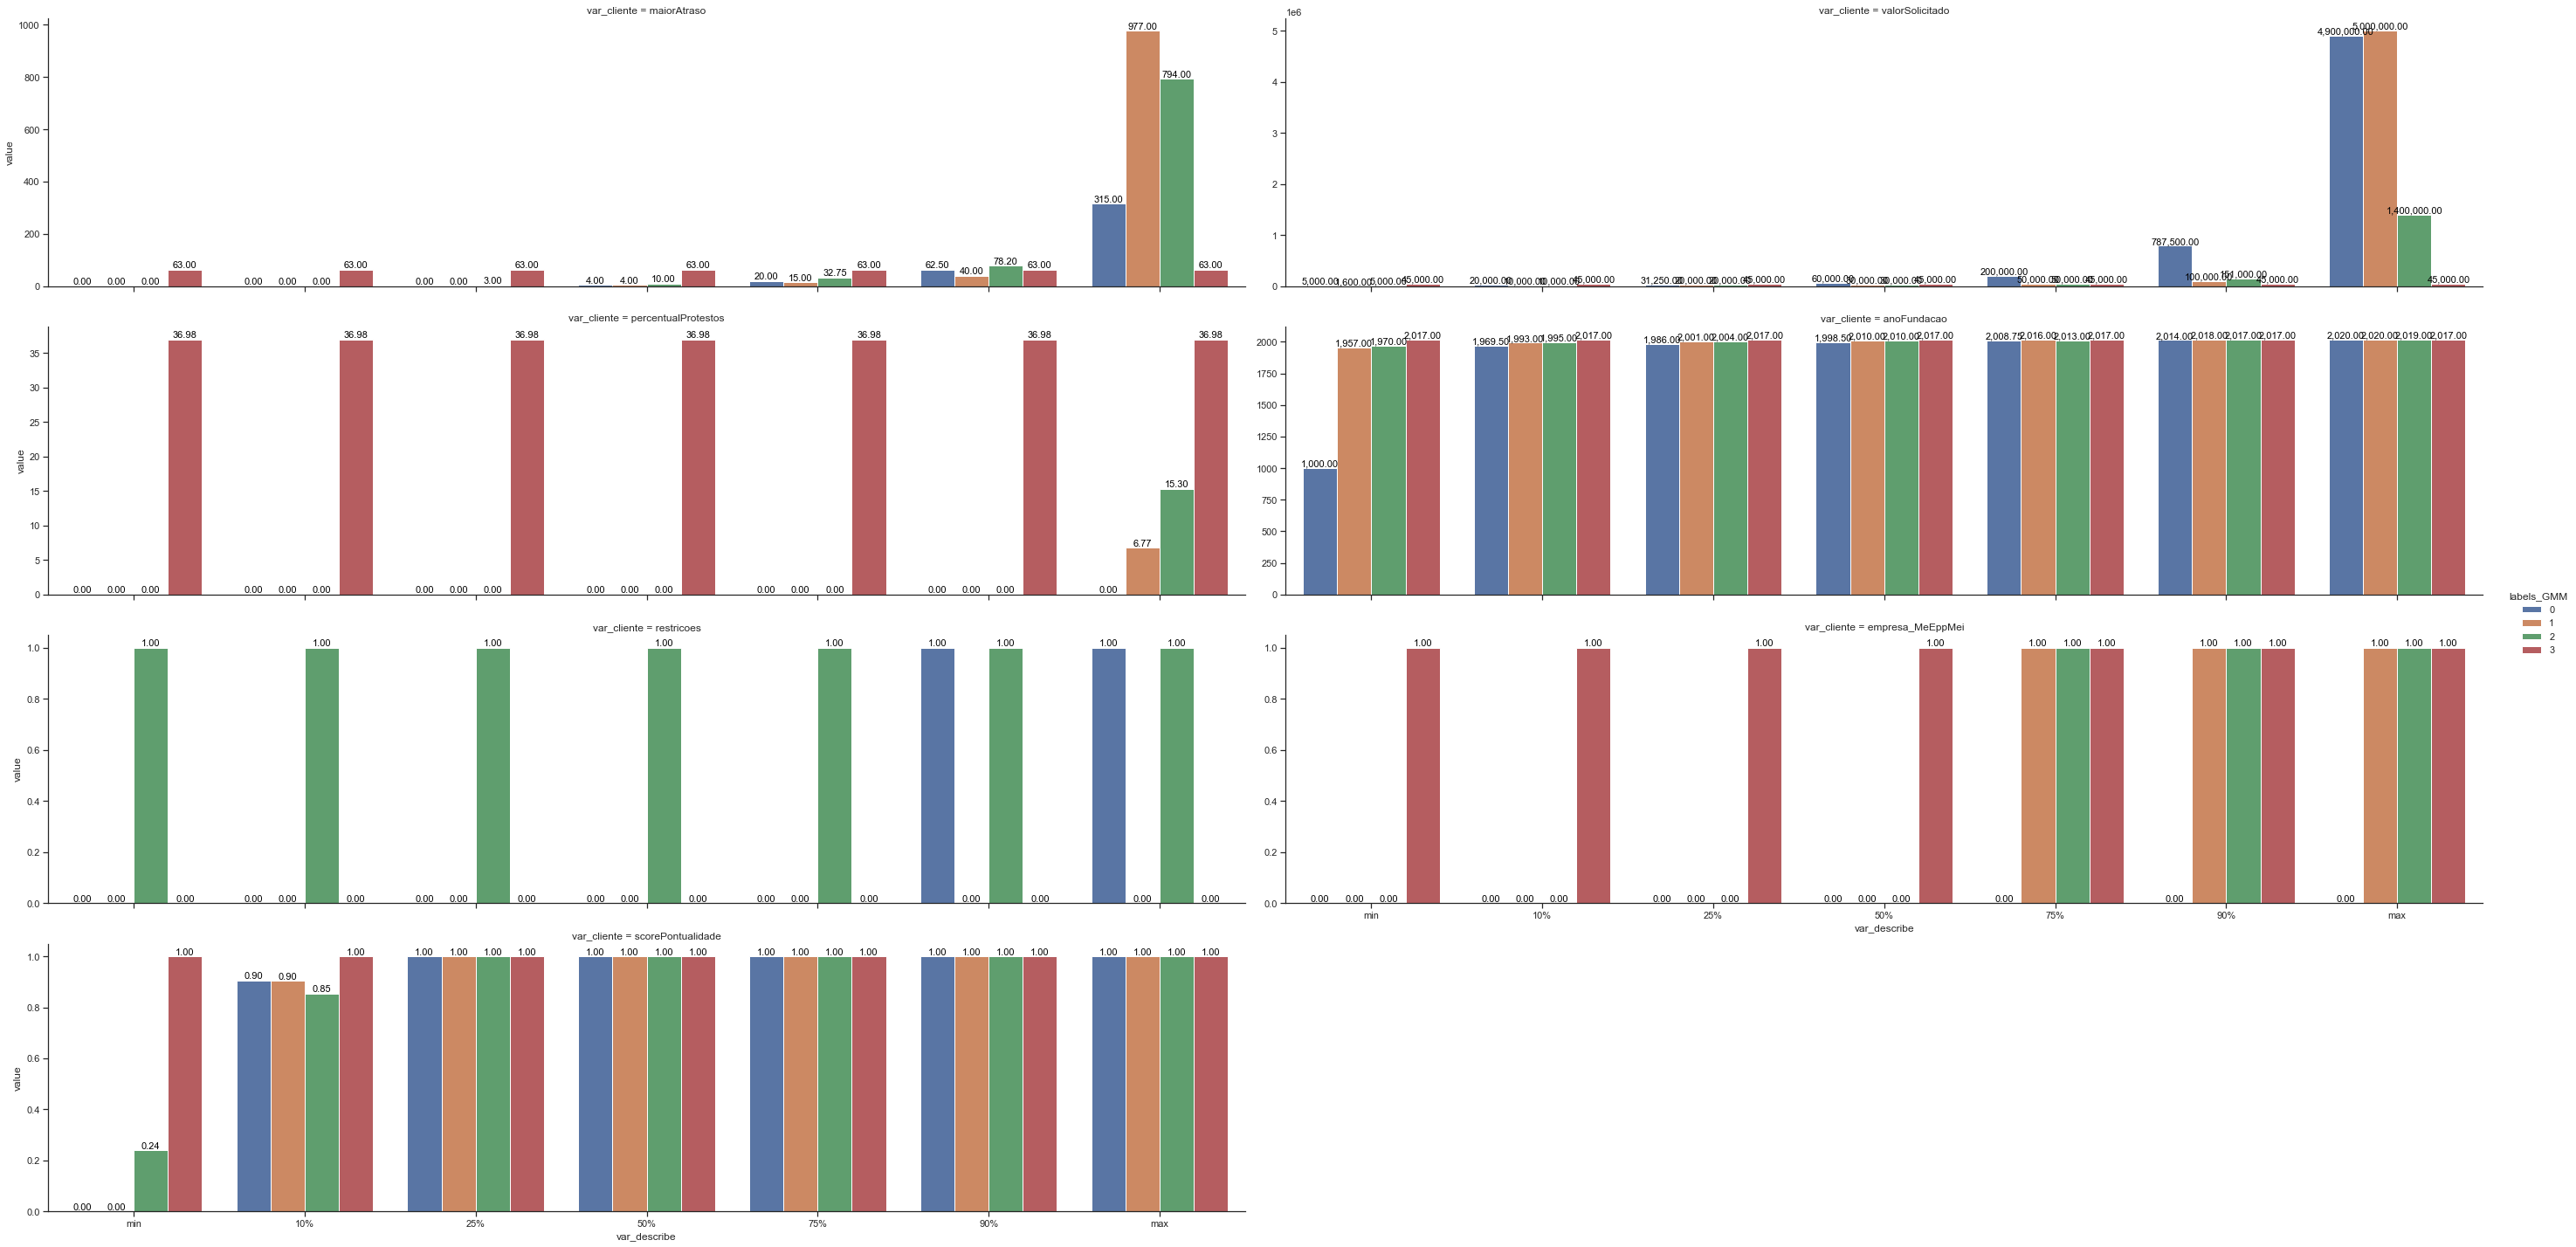

In [40]:
g = sns.catplot(data=df_describe_1, x="var_describe", y="value",col="var_cliente",hue='labels_GMM'
                ,kind='bar',sharey=False,aspect=4,height=5,col_wrap=2)

for ax in g.axes:
    for p in ax.patches:
             ax.annotate('{:,.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')

Gráficos com escala logarítmica (para melhor vosualização)

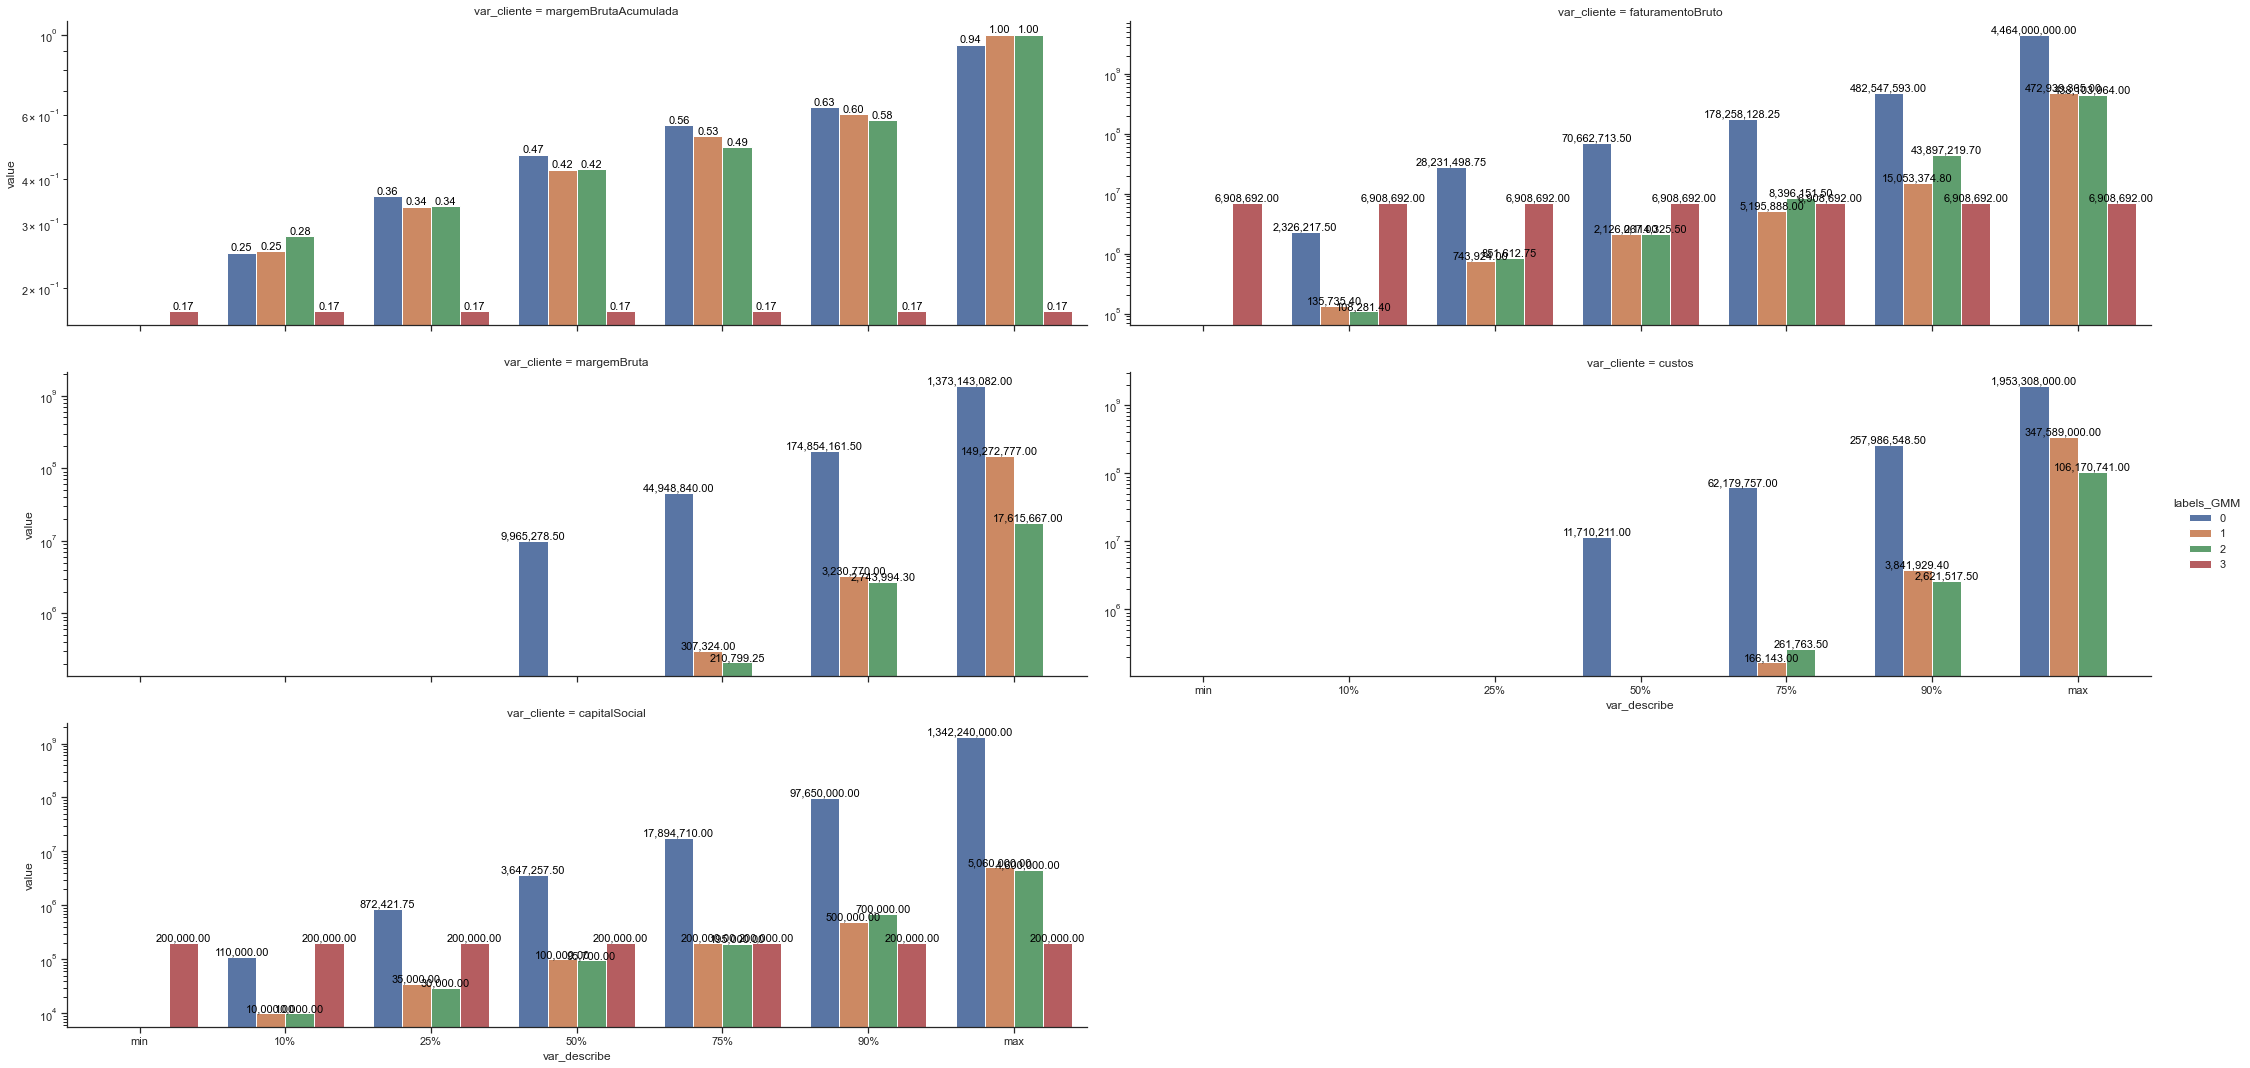

In [41]:
g = sns.catplot(data=df_describe_2, x="var_describe", y="value",col="var_cliente",hue='labels_GMM'
                ,kind='bar',sharey=False,aspect=3,height=5,col_wrap=2)

for ax in g.axes:
    for p in ax.patches:
             ax.annotate('{:,.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')
             ax.set(yscale="log")

Com estes graficos de barras resumindo percentis de cada variável quantitativa dos clusters, podemos assumir algumas premissas sobre os grupos. Abaixo enumeramos caracteristicas inerentes a cada um deles para podermos depois determinarmos a segmentação para futuros clientes:

1. **Tier Bronze - Meia idade**: Este tier contempla empresas que possuem um perfil de margem bruta declarada absoluta menor que todas as outras no geral. Pelo menos 50% desse conjunto não possui margem bruta declarada. Outra variável que foi possível notar é de atraso, que não supera 33 dias em 90% dos casos, mas que podem extrapolar para quase 3 anos. Sua margem percentual está no perfil mediano de toda a base. Estas empresas não possuem restrições. Estas também não possuem custos declarados para pelo menos 75% dos casos.
2. **Tier Mei - Novas em folha**: Este tier possui empresas com a margem bruta um pouco maior que o **Tier Bronze**, tendo porém o acumulado % menor que este. Neste conjunto tiveram atrasos também significativos, em que pelo menos 10% da base atrasou 46 dias ou mais. Toda a base se enquadra em micro e pequenas empresas (Mei), e com isso, possuem o menor faturamento na sua grande maioria quando comparado com os demais clusters. Com isso, estas são empresas que estão em fase de inicio do crescimento.
3. **Tier Ouro - Antigas**: As empresas neste grupo são de um perfil mais rentável. Analisando a distribuição de anos de fundação, elas são as mais antigas quando comparando com os outros clusteres. Possuem um grau de atraso mais frequente em todo o conjunto em comparação com as demais. Existem 25% das empresas nesse grupo com algum tipo de restrição. Sendo assim, por mais que existem restrições e atrasos, isso é balanceado pela robustez de seu faturamento, que é bem maior que as demais, passando em um grau de ordem 10 vezes maior na maioria dos casos.
4. **Tier Prata - Risco Alto**: Esse conjunto contemplam empresas que aparentam estar em fase de cresimento progressivo, tendo uma margem % e bruta menor que todas as outras. Além disso, estas empresas possuem restrições em pelo menos 75% dos casos. Estas também possuem o menor perfil geral de captalização, quando comparadas com as demais. Neste tier existe um potencial de ganho, mas existem varios alertas a se considerar quanto a solidez da empresa. 

Dadas essas caracterizações, podemos criar um modelo de classificação que utiliza-se destas para determinar novos casos. Para isso vamos usar um algorítmo de classificação robusto:

In [42]:
X

,margemBrutaAcumulada,percentualProtestos,empresa_MeEppMei,faturamentoBruto,margemBruta,custos,anoFundacao,capitalSocial,restricoes,scorePontualidade,labels_KMEANS,labels_GMM
0,0.25,0.00,1.00,"1,766,880.00",0.00,0.00,"2,003.00","90,000.00",0.00,1.00,3,1
1,0.62,0.00,1.00,"2,814,940.00",0.00,0.00,"2,014.00","20,000.00",0.00,1.00,3,1
2,0.45,0.00,0.00,"40,779,757.00","81,459,809.00","40,680,051.00","2,002.00","75,000.00",0.00,1.00,0,0
3,0.35,0.00,0.00,"11,958,227.00","9,357,949.00",0.00,"2,000.00","120,000.00",0.00,1.00,0,1
4,0.25,0.00,0.00,"72,479,551.00","6,233,236.00","-49,267,738.00","2,000.00","1,000,000.00",0.00,1.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2059,0.30,0.00,1.00,"1,923,051.00",0.00,0.00,"2,003.00","40,000.00",0.00,1.00,3,1
2060,0.36,0.00,1.00,"2,924,092.00",0.00,0.00,"2,018.00","300,000.00",0.00,1.00,3,1
2061,0.25,0.00,0.00,"1,684,508.00",0.00,0.00,"2,004.00","10,000.00",0.00,1.00,0,1
2062,0.19,0.00,1.00,"1,366,363.00","1,153,580.00","212,783.00","2,017.00","100,000.00",0.00,1.00,3,1


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, X.labels_GMM, random_state=2,train_size=0.7)
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', C=5))
])
rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=5))])

Testando para alguns casos da internet para ver em que cenário elas caem

C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


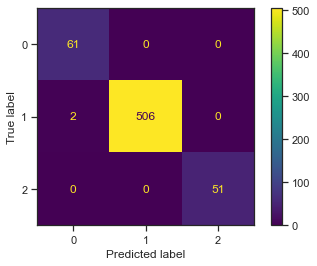

In [44]:
from sklearn.metrics import plot_confusion_matrix
y_pred = rbf_kernel_svm_clf.predict(X_test)
plot_confusion_matrix(rbf_kernel_svm_clf, X_test, y_test)  
plt.show()

In [45]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
print('A precisão ficou em'
,precision_score(y_test, y_pred,average='weighted'),'e o recall ficou em'
,recall_score(y_test, y_pred,average='weighted'),'sendo que no geral a acurácia é',accuracy_score(y_test, y_pred))

A precisão ficou em 0.9968766001024065 e o recall ficou em 0.9967741935483871 sendo que no geral a acurácia é 0.9967741935483871


# 3. Modelagem para análise de crédito
Para o modelo de análise de credito, podemos dividir em:

- Modelo para primeira compra
- Modelo para clientes recorrentes

Carregando bibliotecas necessárias

In [46]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

#Função para tirar NaN e Outliers (1%)
def ajusta_outliers(df, x):

    lower_limit = df[x].quantile(0.01)  
    upper_limit = df[x].quantile(0.99)

    df[x].fillna(-9999999, inplace=True)

    df[x] = np.where((df[x] < lower_limit) & (df[x] != -9999999), lower_limit, df[x])
    df[x] = np.where((df[x] > upper_limit) & (df[x] != -9999999), upper_limit, df[x])
    return df

In [47]:
df = df_creditos.drop(['numero_solicitacao', 'razaoSocial','nomeFantasia','cnpjSemTraco','status','definicaoRisco','diferencaPercentualRisco','dashboardCorrelacao','intervaloFundacao'], axis=1)

### 3.1 Pré processamento de base
Abaixo estão algumas tratativas de base

In [48]:
#Ajustar datas
df['dataConsiderada'] = df['dataAprovadoNivelAnalista'].where(df['dataAprovadoNivelAnalista'] > '0', df['dataAprovadoEmComite'])
df['dataConsiderada'] = pd.to_datetime(df['dataConsiderada'], errors='coerce')
df['primeiraCompra'] = pd.to_datetime(df['primeiraCompra'], errors='coerce')
df['periodoBalanco'] = pd.to_datetime(df['periodoBalanco'], errors='coerce')
df = df.drop(['dataAprovadoNivelAnalista','dataAprovadoEmComite'], axis=1)

#Calcular diferença de datas
df['idadeNaSolicitacao'] = pd.DatetimeIndex(df['dataConsiderada']).year - df['anoFundacao']
df['periodoBalanco_Anos'] = pd.DatetimeIndex(df['dataConsiderada']).year - pd.DatetimeIndex(df['periodoBalanco']).year
df['primeiraCompra_Anos'] = pd.DatetimeIndex(df['dataConsiderada']).year - pd.DatetimeIndex(df['primeiraCompra']).year
df = df.drop(['anoFundacao','periodoBalanco','primeiraCompra','dataConsiderada'], axis=1)

#Criar dummys de EPP e Restrições
df = pd.get_dummies(df)
df = df.drop(['empresa_MeEppMei_False','restricoes_False'], axis=1)

#Remove Outliers e NaN
df = ajusta_outliers(df,'percentualProtestos')
df = ajusta_outliers(df,'ativoCirculante')
df = ajusta_outliers(df,'passivoCirculante')
df = ajusta_outliers(df,'totalAtivo')
df = ajusta_outliers(df,'totalPatrimonioLiquido')
df = ajusta_outliers(df,'endividamento')
df = ajusta_outliers(df,'duplicatasAReceber')
df = ajusta_outliers(df,'estoque')
df = ajusta_outliers(df,'faturamentoBruto')
df = ajusta_outliers(df,'margemBruta')
df = ajusta_outliers(df,'custos')
df = ajusta_outliers(df,'capitalSocial')
df = ajusta_outliers(df,'scorePontualidade')
df = ajusta_outliers(df,'limiteEmpresaAnaliseCredito')
df = ajusta_outliers(df,'idadeNaSolicitacao')
df = ajusta_outliers(df,'periodoBalanco_Anos')
df = ajusta_outliers(df,'primeiraCompra_Anos')
df = ajusta_outliers(df,'valorAprovado')

df['Aprovado_True'] = np.where((df['valorAprovado'] < 0) , 0, 1)

Analisando como as colunas ficaram após o tratamento

In [49]:
descritiva_tabela(df)

,count,mean,std,min,25%,50%,75%,max,dtype,size,% count
maiorAtraso,"8,965.00",24.66,66.21,0.00,3.00,6.00,22.00,"1,265.00",int64,8965,0.00
margemBrutaAcumulada,"8,965.00",0.36,0.20,0.00,0.28,0.40,0.51,1.00,float64,8965,0.00
percentualProtestos,"8,965.00","-1,668,711.49","3,728,815.65","-9,999,999.00",0.00,0.00,0.00,0.00,float64,8965,0.00
prazoMedioRecebimentoVendas,"8,965.00",23.10,68.20,0.00,0.00,0.00,30.00,"1,605.00",int64,8965,0.00
titulosEmAberto,"8,965.00","64,928.89","248,388.35",0.00,0.00,0.00,"17,280.00","3,938,589.70",float64,8965,0.00
valorSolicitado,"8,965.00","749,360.59","22,628,835.17",100.00,"25,000.00","50,000.00","120,000.00","1,500,000,000.00",float64,8965,0.00
percentualRisco,"8,965.00",0.25,0.15,0.00,0.14,0.25,0.36,0.79,float64,8965,0.00
valorAprovado,"8,965.00","-1,418,214.47","3,716,250.00","-9,999,999.00","10,000.00","30,000.00","75,000.00","2,619,500.00",float64,8965,0.00
ativoCirculante,"8,965.00","11,740,807.07","78,600,895.51","-9,999,999.00","-9,999,999.00",0.00,"4,443,609.00","808,359,733.80",float64,8965,0.00
passivoCirculante,"8,965.00","4,750,909.59","47,930,859.00","-9,999,999.00","-9,999,999.00",0.00,"1,592,690.00","476,069,297.00",float64,8965,0.00


Preparando a base com veriaveis e respotas

In [50]:
# tirando uma cópia para preservar o DataFrame original
df_copia = df.copy()

# definindo os recuros de entrada(X) e saida(y) 
X = df_copia.drop(['valorAprovado','Aprovado_True'], axis=1)
X = X.iloc[: , :].values
y = df_copia['Aprovado_True'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    shuffle=True, 
                                                    random_state = 0)

# verificando a dimensão dos dados de treino e teste
print(f'Dados para Treino: {X_train.shape[0]} amostras')
print(f'Dados para Teste: {X_test.shape[0]} amostras') 

Dados para Treino: 6275 amostras
Dados para Teste: 2690 amostras


### 3.2 Preparando o modelo para treino
#### 3.2.1 Modelo de concessão de credito (sim ou não) 

In [52]:
from xgboost import XGBClassifier
clf = XGBClassifier(random_state=0)

# Training the XGB classifier
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Fazendo a predição com os dados de teste

In [53]:
y_pred = clf.predict(X_test)

Para verificar a performance do modelo, visualizamos os resultados pela Matriz de Confusão

C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


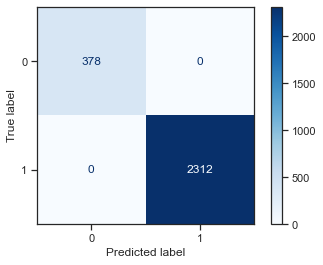

In [54]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')

Score da Acurácia

In [55]:
print(f'Precisão do modelo : {round(accuracy_score(y_test, y_pred)*100,3)}%')

Precisão do modelo : 100.0%


In [56]:
new_df = df.copy()
new_df = new_df.loc[df['Aprovado_True'] == 1]
new_df = new_df.drop(['Aprovado_True'], axis=1)

##### 3.2.2 Modelo de volume de concessão de crédito
Antes de fazer o treino, é necessário ainda fazer pré processamento da coluna do valor aprovado para determinar um range de buckets para previsão

In [57]:
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
new_df['Bin'] = pd.qcut(new_df['valorAprovado'], 20, labels=labels,duplicates='drop') #
new_df = new_df.drop(['valorAprovado'], axis=1)

Definindo os recuros de entrada(X) e saida(y) 

In [58]:
X2 = new_df.drop(['Bin'], axis=1)
X2 = X2.iloc[: , :].values
y2 = new_df['Bin'].values

In [59]:
# separando os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, 
                                                    test_size = 0.30, 
                                                    shuffle=True, 
                                                    random_state = 0)

# verificando a dimensão dos dados de treino e teste
print(f'Dados para Treino: {X_train2.shape[0]} amostras')
print(f'Dados para Teste: {X_test2.shape[0]} amostras')

Dados para Treino: 5293 amostras
Dados para Teste: 2269 amostras


Treinando o modelo

In [60]:
#Preparando o modelo e executando
clf2 = XGBClassifier(random_state=0)

# Training the XGB classifier
clf2.fit(X_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

Fazendo a predição com os dados de teste

In [61]:
y_pred2 = clf2.predict(X_test2)

Apresentando os resultados pela Matriz de Confusão

C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


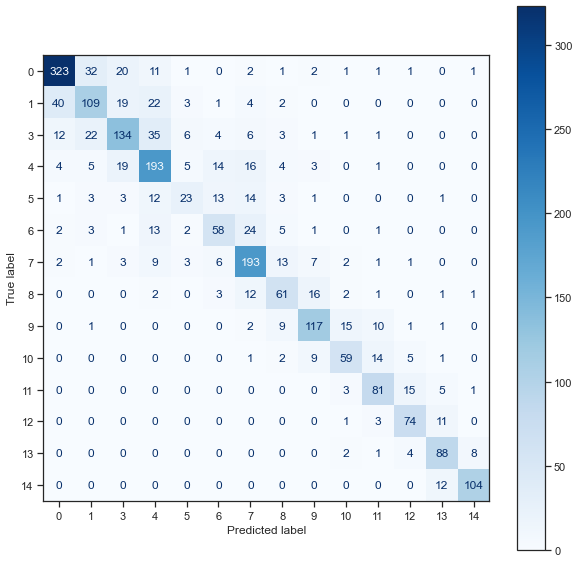

In [62]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf2, X_test2, y_test2, cmap='Blues',ax=ax)